# Should a host's industry experience affect your choice when booking an airbnb in Sydney?

Sydney Airbnb Data Listing

Karen Stevani (z5573992)

In [2]:
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import numpy as np
import plotly.graph_objects as go
from datetime import datetime

In [3]:
%matplotlib inline

In [4]:
plt.rcParams["figure.figsize"] = (30, 15)

In [5]:
saved_style_state = matplotlib.rcParams.copy()  # give us a style state to go back to

In [6]:
#loading from file
if os.path.isfile("sydney_airbnb_listing.csv"):
    filepath = "sydney_airbnb_listing.csv"
    print("loading from file")
else:
    filepath = "https://data.insideairbnb.com/australia/nsw/sydney/2024-03-16/data/listings.csv.gz"
    print("loading from the internet")

listing_data = pd.read_csv(filepath)
print("done")

loading from file
done


Data Set: "Detailed Sydney Listings data" from insideairbnb.com

Published by: Inside Airbnb, licensed under a Creative Commons Attribution 4.0 International License, on 10 June 2024

This data explores ....

In [7]:
listing_data.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1050164598350388320,https://www.airbnb.com/rooms/1050164598350388320,20240316023820,2024-03-18,city scrape,Self service English breakfast,Close to transport airport older style unit ne...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,211218678,...,NaN,NaN,NaN,PID-STRA-61891,f,1,0,1,0,NaN
1,1096082243192434668,https://www.airbnb.com/rooms/1096082243192434668,20240316023820,2024-03-18,city scrape,Apartment in Rushcutters Bay,Full 2 bedroom apartment with balcony. Walking...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,26721338,...,NaN,NaN,NaN,Exempt,f,2,1,1,0,NaN
2,2167538,https://www.airbnb.com/rooms/2167538,20240316023820,2024-03-18,city scrape,"Modern Sydney home near beach,shops",**Availability extremely flexible**<br /><br /...,Queens Park is a safe and friendly neighbourho...,https://a0.muscache.com/pictures/29922910/2399...,11059668,...,5.00,5.00,4.00,NaN,f,1,1,0,0,0.01
3,790607305500629830,https://www.airbnb.com/rooms/790607305500629830,20240316023820,2024-03-18,city scrape,Luxury double room,Relax in this tranquil and stylish space.,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,202112801,...,4.77,4.68,4.68,PID-STRA-21723,f,30,5,25,0,2.13
4,641106357139201992,https://www.airbnb.com/rooms/641106357139201992,20240316023820,2024-03-18,city scrape,Chic Studio Apartment in Prime Bondi Location,Immerse yourself in the vibrant atmosphere of ...,Bondi is one of Australia’s most iconic suburb...,https://a0.muscache.com/pictures/prohost-api/H...,279001183,...,3.94,4.94,4.29,PID-STRA-36651,f,217,217,0,0,0.84


In [8]:
listing_data.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

This dataset provides information on 14274 rows and 75 columns

Sydney Airbnb host trends

In [9]:
listing_data['host_since'] = pd.to_datetime(listing_data['host_since'])
date_format_pattern = "%B, %Y"
earliest_date = datetime.strftime(listing_data.host_since.min(), date_format_pattern)
latest_date = datetime.strftime(listing_data.host_since.max(), date_format_pattern)
f"Range of the earliest to most recent time a person becomes an airbnb host is: {earliest_date} to {latest_date}"

'Range of the earliest to most recent time a person becomes an airbnb host is: June, 2009 to March, 2024'

<Axes: xlabel='host_location'>

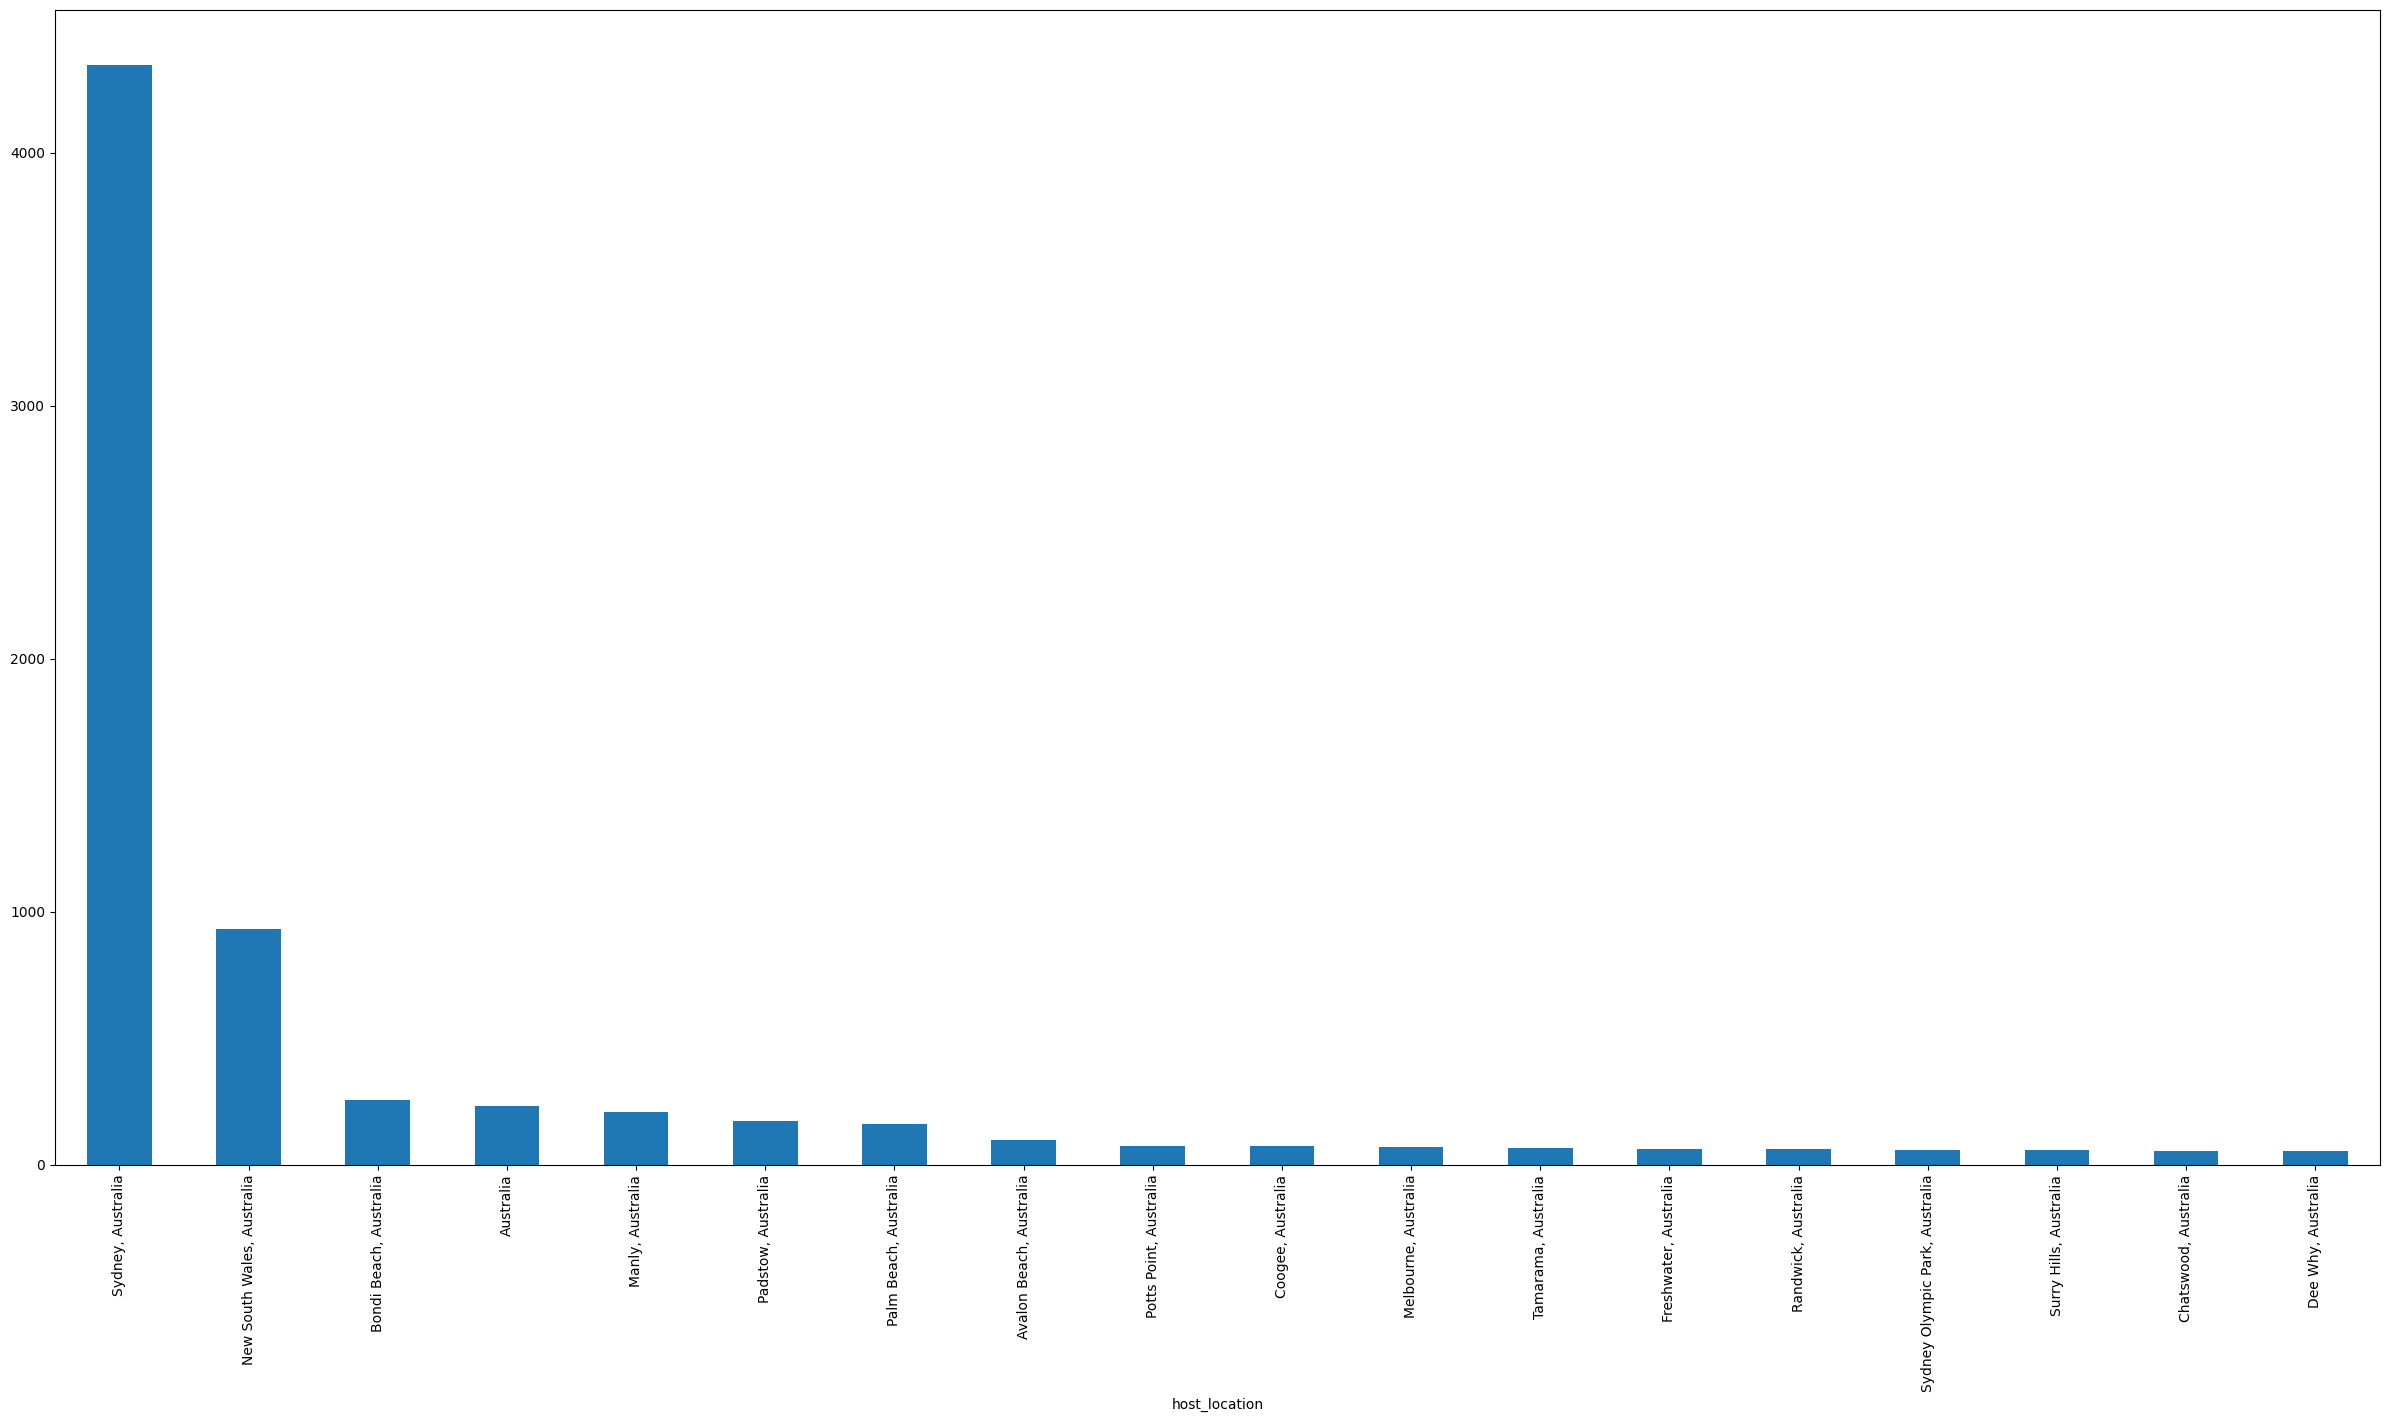

In [10]:
host_location = listing_data.host_location.value_counts() # This makes a series
host_location[host_location > 50].plot(kind="bar")

In [11]:
listing_data.host_neighbourhood.value_counts()

host_neighbourhood
Surry Hills                  394
Central Business District    290
Newtown/Enmore               252
Palm Beach                   239
Bondi Beach                  216
                            ... 
Allawah                        1
Croydon Park                   1
Riverwood                      1
Pimlico                        1
Justicia                       1
Name: count, Length: 177, dtype: int64

<Axes: xlabel='host_neighbourhood'>

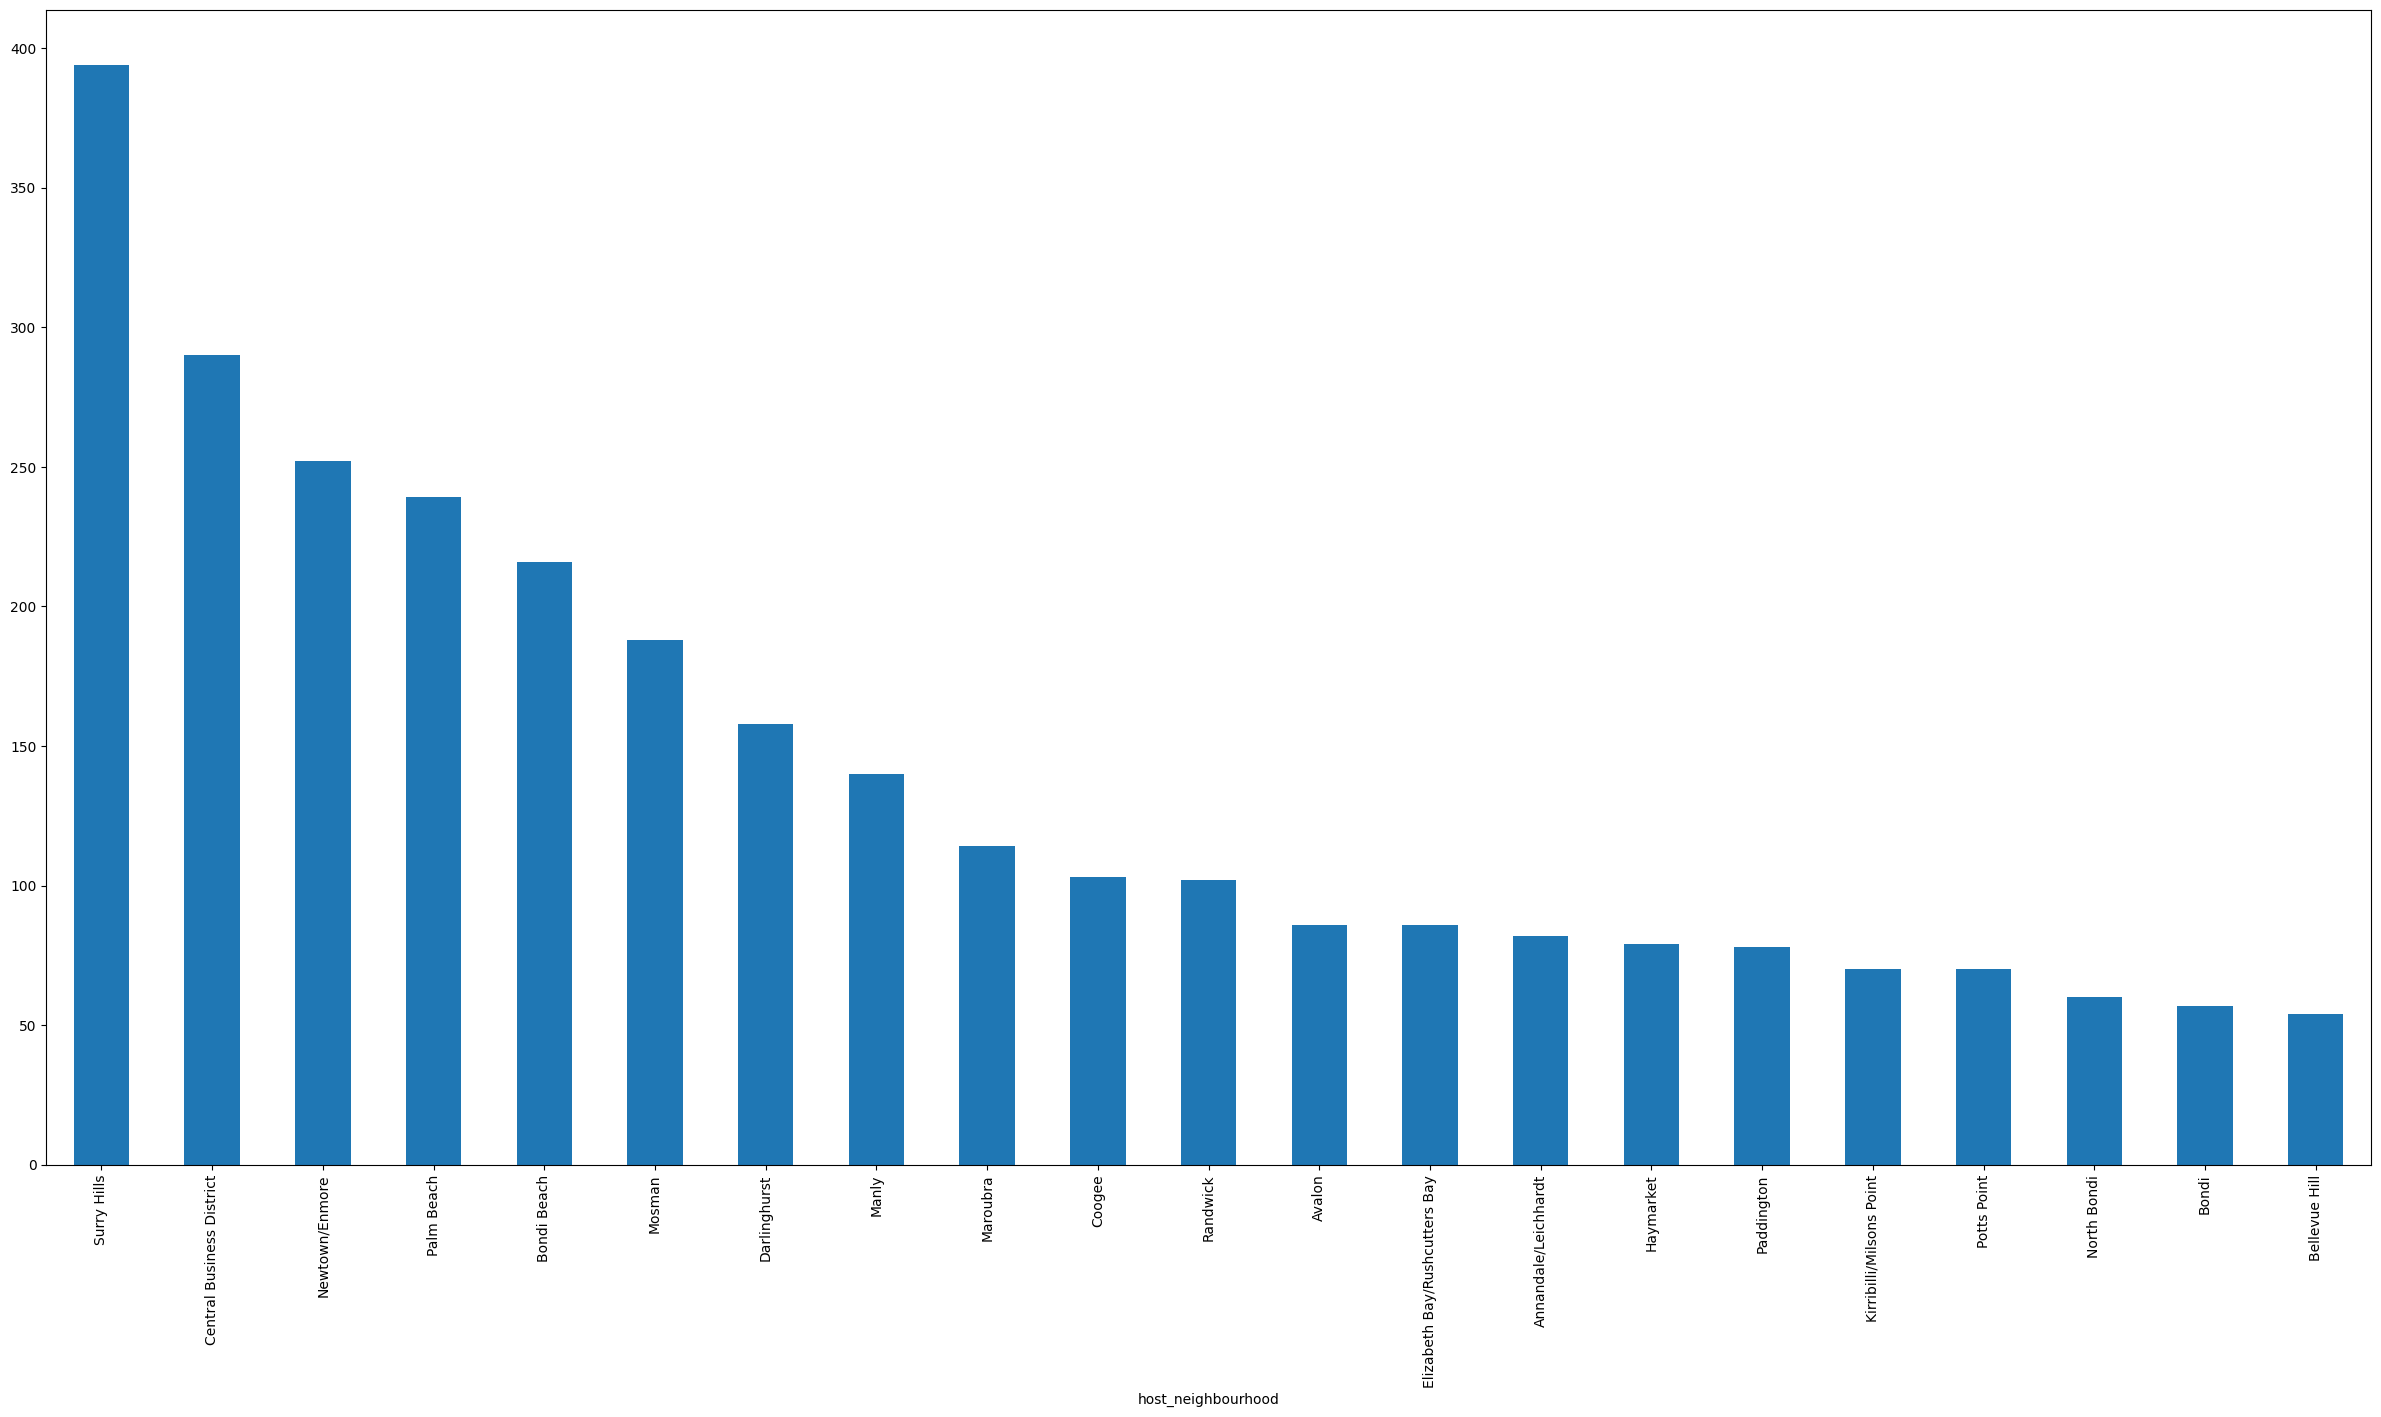

In [12]:
host_neighbourhood = listing_data.host_neighbourhood.value_counts() # This makes a series
host_neighbourhood[host_neighbourhood > 50].plot(kind="bar")

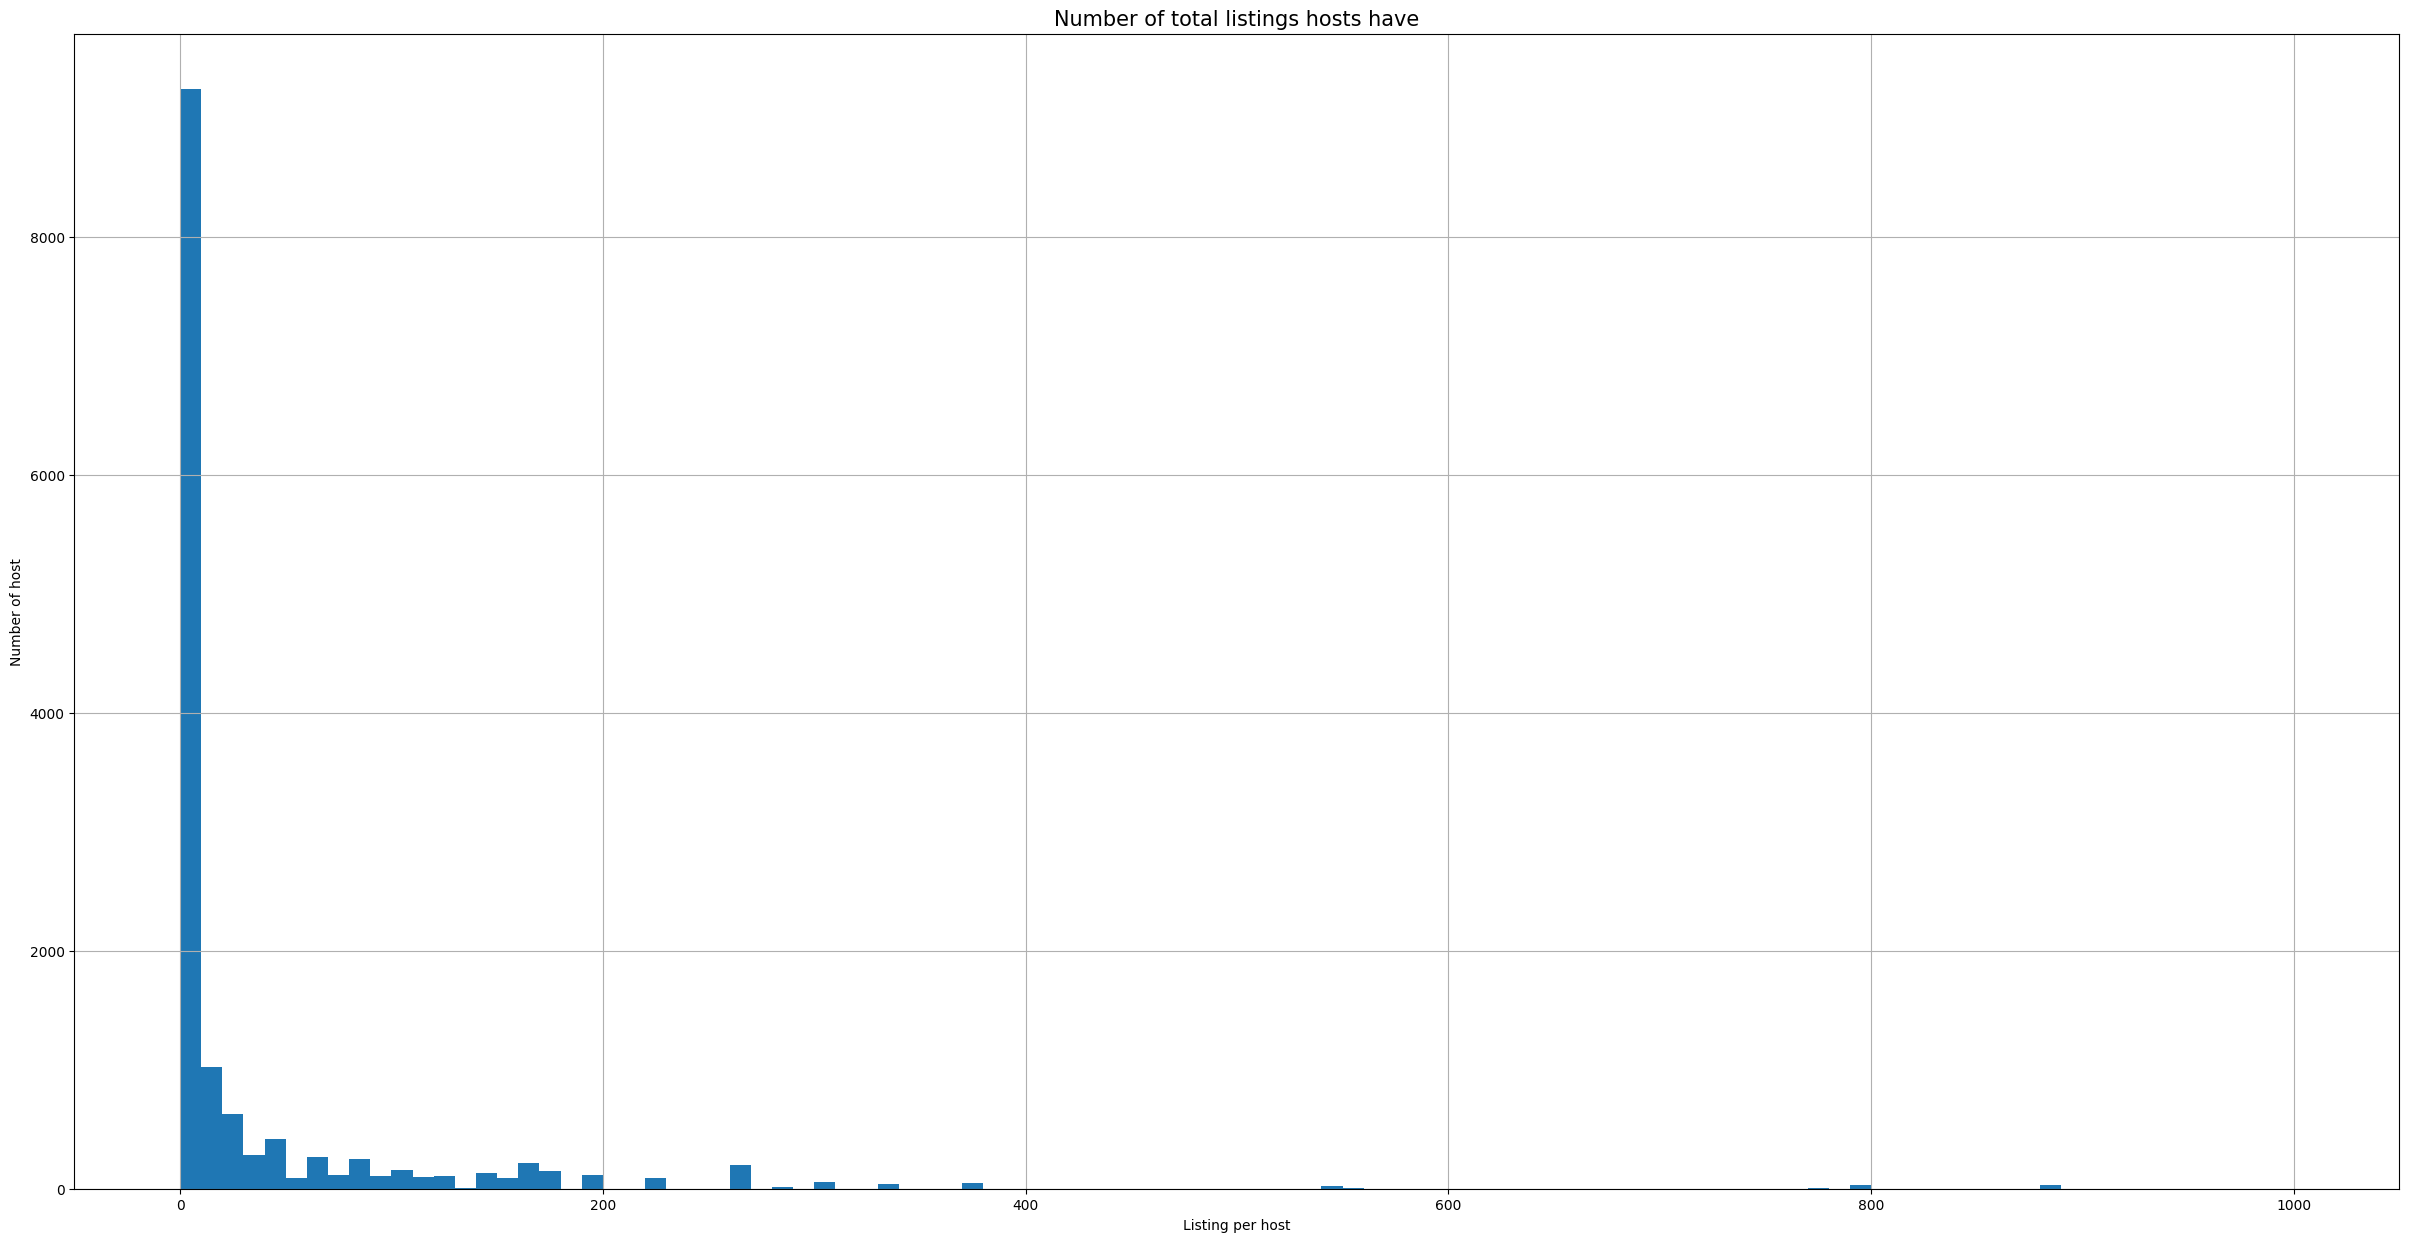

In [13]:
number_of_bins = 100
lower_bound = 0
upper_bound = 1000

plt.hist(listing_data.host_total_listings_count, bins=number_of_bins, range=(lower_bound, upper_bound))
plt.title("Number of total listings hosts have", fontsize=15)
plt.xlabel("Listing per host", fontsize=10)
plt.ylabel("Number of host", fontsize=10)
plt.grid(True)
plt.show()

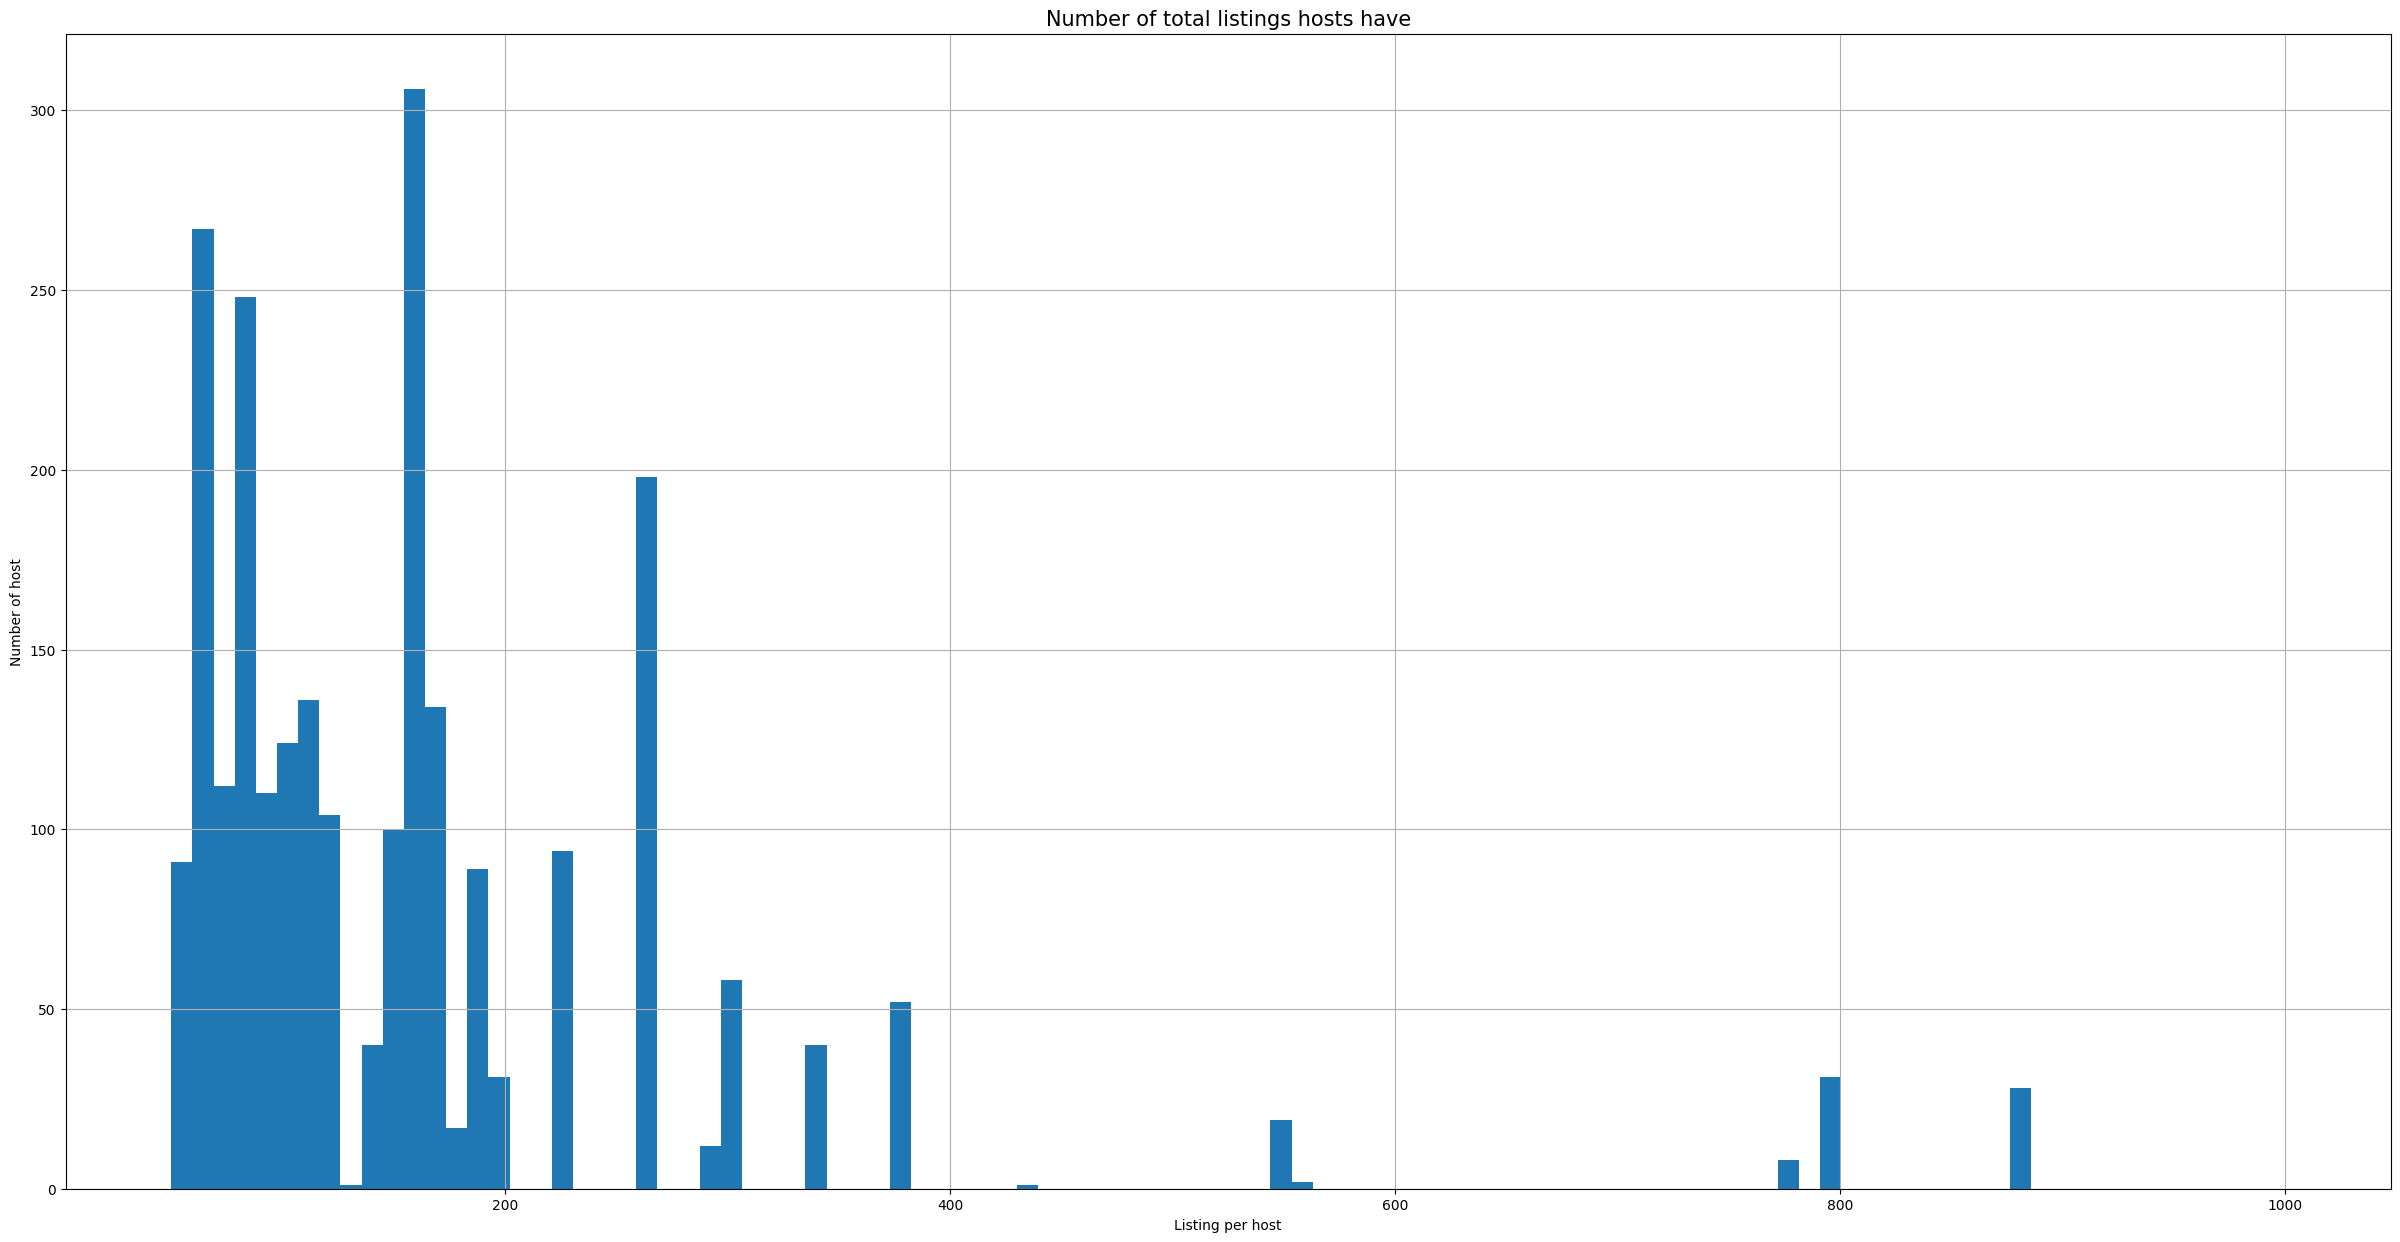

In [14]:
number_of_bins = 100
lower_bound = 50
upper_bound = 1000

plt.hist(listing_data.host_total_listings_count, bins=number_of_bins, range=(lower_bound, upper_bound))
plt.title("Number of total listings hosts have", fontsize=15)
plt.xlabel("Listing per host", fontsize=10)
plt.ylabel("Number of host", fontsize=10)
plt.grid(True)
plt.show()

In [22]:
listing_data.host_response_rate

Series([], Name: host_response_rate, dtype: object)

Now that we have looked at some basic trends of hosts that have sydney airbnb listings, let us determined aspects that are typically considered when booking a place to stay. The aspects that discussed here focuses primarly on 3 main categories:

1. Value

Value that is discuss here is in relation to pricing. As potential customers, we are always looking for reasonable value for our money's worth, especially in Sydney's intense pricing market. Although there are also aspects that affects pricing itself, such as the amount of space, facilities, location, hygiene, estate's age and more, this filtration process will mainly focus on standardizing the price for accomodating one person's living and the average price as a benchmark

In [15]:
listing_data.price

0        $100.00
1        $250.00
2        $650.00
3         $84.00
4        $508.00
          ...   
14269     $88.00
14270    $143.00
14271    $120.00
14272    $180.00
14273    $123.00
Name: price, Length: 14274, dtype: object

In [16]:
listing_data.accommodates

0        2
1        4
2        5
3        1
4        2
        ..
14269    2
14270    2
14271    4
14272    2
14273    2
Name: accommodates, Length: 14274, dtype: int64

In [18]:
listing_data['price'] = pd.to_numeric(listing_data['price'], errors='coerce')
print(listing_data[['price']].isnull().sum())
listing_data.dropna(subset=['price'], inplace=True)

listing_data['price'] = listing_data['price'].astype(int)
listing_data.to_csv('modifiedlisting_data.csv', index=False)

price    0
dtype: int64


In [20]:
listing_data = pd.read_csv('modifiedlisting_data.csv')
listing_data['Standardizedprice'] = listing_data['price'] / listing_data['accommodates']
listing_data.to_csv('modified_data.csv', index=False)

listing_data['Standardizedprice'] = pd.to_numeric(listing_data['Standardizedprice'], errors='coerce')
listing_data['Standardizedprice'] = listing_data['Standardizedprice'].astype(int) #converting price to integer data type to do division
print(listing_data[['Standardizedprice']].isnull().sum())
listing_data.dropna(subset=['Standardizedprice'], inplace=True)

Standardizedprice    0
dtype: int64


In [21]:
listing_data.Standardizedprice

Series([], Name: Standardizedprice, dtype: int32)

2. Location

Another aspect that is typically considered when booking is location. Does a hosts' industry experience affect this? For several data and insights under this section, the benchmark that is used is the location's review scores as a reference. 

3. Review Scores

Review scores are also a qualitative meansurement in a quantitative form that allows customers a peek into what pros and cons are expected before purchase from other peoples' previous experiences. This dataset provides various categories of reviews, whether time bound or type bound.